In [1]:
import numpy as np
import os
# 通过如下代码可以将matplot的图表显示在notebook中
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### 数据集读取
- Mnist数据是图像数据:(28,28,1)的灰度图

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, return_X_y=False, as_frame=False)
X, Y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape)
print(Y.shape)
mnist

(70000, 784)
(70000,)


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

![title](./img/9.png)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [28]:
# 洗牌操作
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [29]:
shuffle_index
print(f"y_train = {np.unique(y_train)}")

y_train = ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


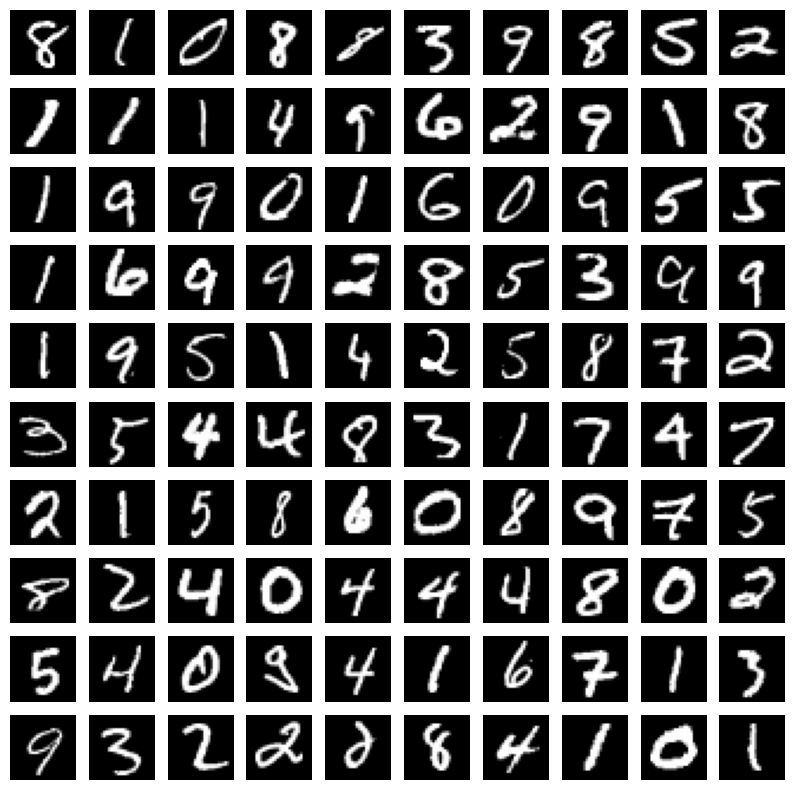

In [17]:
import matplotlib.pyplot as plt

# sklearn提供数据集，matplotlib进行展示操作
# minest数组，X是二维数组，每个X[i]定义了一张图片，通过下方代码可以用matplotlib打印出图片来
# y是一个一维数组，表示每张图片写的是什么数字
num_images = 100
images_per_row = 10

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_images // images_per_row, images_per_row, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off') #隐藏坐标轴

### 交叉验证

![title](./img/5.png)

![title](./img/7.png)

In [30]:
#结果是一个与 y_train 大小相同的布尔数组，表示哪些图片的标签是数字 5。如果 y_train[i] 等于 5，那么 y_train_5[i] 为 True。
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

In [31]:
print(f"y_test_5 = {y_test_5}")
y_train_5[:10]

print(np.unique(y_train_5))
print(np.unique(y_test_5))

y_test_5 = [False False False ... False  True False]
[False  True]
[False  True]


In [32]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [38]:
sgd_clf.predict([X[34081]])

array([False])

In [37]:
y[34081]

'7'

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9502 , 0.96565, 0.96495])

In [14]:
X_train.shape

(60000, 784)

In [15]:
y_train_5.shape

(60000,)

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skflods = StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skflods.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.9502
0.96565
0.96495


### Confusion Matrix-混淆矩阵

![title](./img/8.png)

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [18]:
y_train_pred.shape

(60000,)

In [19]:
X_train.shape

(60000, 784)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

negative class  [[ **true negatives** , **false positives** ],
 
positive class  [ **false negatives** , **true positives** ]]

* true negatives:  53,272个数据被正确的分为非5类别
* false positives：1307张被错误的分为5类别

* false negatives：1077张错误的分为非5类别
* true positives： 4344张被正确的分为5类别

一个完美的分类器应该只有**true positives** 和 **true negatives**, 即主对角线元素不为0，其余元素为0

### Precision and Recall


### **$ precision = \frac {TP} {TP + FP} $**


### **$ recall = \frac {TP} {TP + FN} $**

![title](./img/1.png)

In [21]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.7687135020350381

In [22]:
recall_score(y_train_5,y_train_pred)

0.801328168234643

将**Precision** 和 **Recall**结合到一个称为**F1 score** 的指标,调和平均值给予低值更多权重。 因此，如果召回和精确度都很高，分类器将获得高F 1分数。

### $ F_1  = $ $2\over {1\over precision}+{1\over recall} $ $=$ $2×$ $precision×recall\over precision+recall $ $=$ $TP\over {TP}+{FN + FP\over 2}$

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7846820809248555

### 阈值对结果的影响

![title](./img/2.png)

In [24]:
y_scores = sgd_clf.decision_function([X[35000]])
y_scores

array([43349.73739616])

In [25]:
t = 50000
y_pred = (y_scores > t)
y_pred

array([False])

Scikit-Learn不允许直接设置阈值，但它可以得到决策分数，调用其**decision_function（）**方法，而不是调用分类器的**predict（）**方法，该方法返回每个实例的分数，然后使用想要的**阈值**根据这些分数进行预测：

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [35]:
y_scores[:10]

array([ -434076.49813641, -1825667.15281624,  -767086.76186905,
        -482514.55006702,  -466416.8082872 ,  -311904.74603814,
        -582112.5580173 ,  -180811.15850786,  -442648.13282116,
         -87710.09830358])

In [36]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [39]:
y_train_5.shape

(60000,)

In [38]:
thresholds.shape

(59698,)

In [40]:
precisions[:10]

array([0.09080706, 0.09079183, 0.09079335, 0.09079487, 0.09079639,
       0.09079792, 0.09079944, 0.09080096, 0.09080248, 0.090804  ])

In [41]:
precisions.shape

(59699,)

In [42]:
recalls.shape

(59699,)

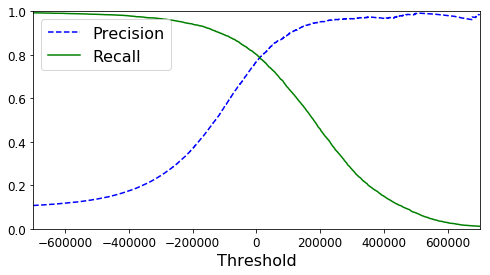

In [35]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,
             precisions[:-1],
            "b--",
            label="Precision")
    
    plt.plot(thresholds,
             recalls[:-1],
            "g-",
            label="Recall")
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0,1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-700000, 700000])
plt.show()

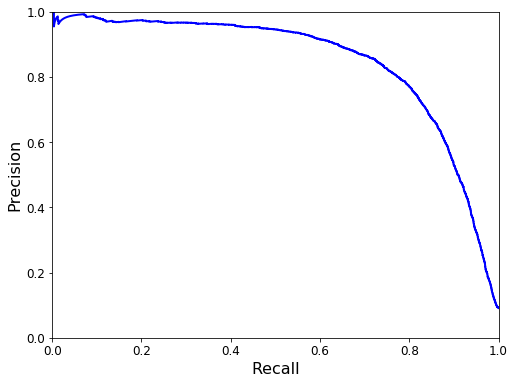

In [36]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, 
             precisions, 
             "b-", 
             linewidth=2)
    
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC curves
**receiver operating characteristic (ROC)** 曲线是二元分类中的常用评估方法
* 它与精确度/召回曲线非常相似，但ROC曲线不是绘制精确度与召回率，而是绘制**true positive rate(TPR)** 与**false positive rate(FPR)** 

* 要绘制ROC曲线，首先需要使用**roc_curve（）**函数计算各种阈值的**TPR和FPR**：

TPR = TP / (TP + FN) (Recall)

FPR = FP / (FP + TN)

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

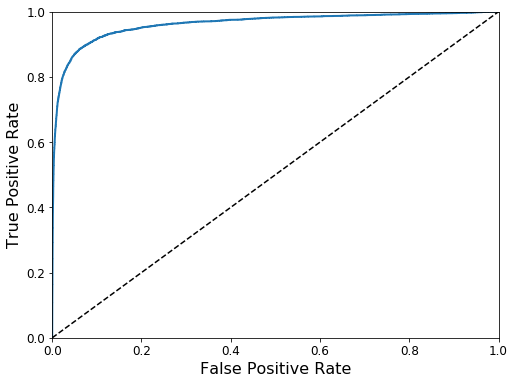

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

**虚线表示纯随机分类器的ROC曲线**; 一个好的分类器尽可能远离该线（朝左上角）。

比较分类器的一种方法是测量曲线下面积（AUC）。完美分类器的ROC AUC**等于1**，而纯随机分类器的ROC AUC**等于0.5**。 Scikit-Learn提供了计算ROC AUC的函数：

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9624496555967156